In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


df = pd.read_csv("/content/drive/MyDrive/Datasets/Cleaned_Algerian_forest_fires_dataset.csv")
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


###  **Some data cleaning was done in another notebook**

---



In [3]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0','day', 'month', 'year'], axis = 1, inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
### Label encoding

df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0,1)

In [8]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
X = df.drop("FWI", axis = 1)
y = df["FWI"]

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [11]:
print(X_train.shape)
print(y_train.shape)

(182, 11)
(182,)


### **Feature Selection( Based on Correlation )**

---



In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.649784,-0.236087,-0.336819,0.682811,0.480897,0.372954,0.610004,0.455140,0.516771,0.224291
RH,-0.649784,1.000000,0.154108,0.226188,-0.631234,-0.396898,-0.193122,-0.697163,-0.332031,-0.376242,-0.390892
Ws,-0.236087,0.154108,1.000000,0.160329,-0.092054,0.048038,0.095338,0.062474,0.072288,0.012472,-0.171313
Rain,-0.336819,0.226188,0.160329,1.000000,-0.550582,-0.274551,-0.287269,-0.326489,-0.285904,-0.350733,-0.075519
FFMC,0.682811,-0.631234,-0.092054,-0.550582,1.000000,0.595207,0.496051,0.721309,0.582725,0.739484,0.207339
DMC,0.480897,-0.396898,0.048038,-0.274551,0.595207,1.000000,0.876911,0.672158,0.981672,0.585311,0.171335
DC,0.372954,-0.193122,0.095338,-0.287269,0.496051,0.876911,1.000000,0.469801,0.940860,0.526904,-0.101141
ISI,0.610004,-0.697163,0.062474,-0.326489,0.721309,0.672158,0.469801,1.000000,0.625044,0.717984,0.273903
BUI,0.455140,-0.332031,0.072288,-0.285904,0.582725,0.981672,0.940860,0.625044,1.000000,0.593534,0.064735
Classes,0.516771,-0.376242,0.012472,-0.350733,0.739484,0.585311,0.526904,0.717984,0.593534,1.000000,0.114374


<Axes: >

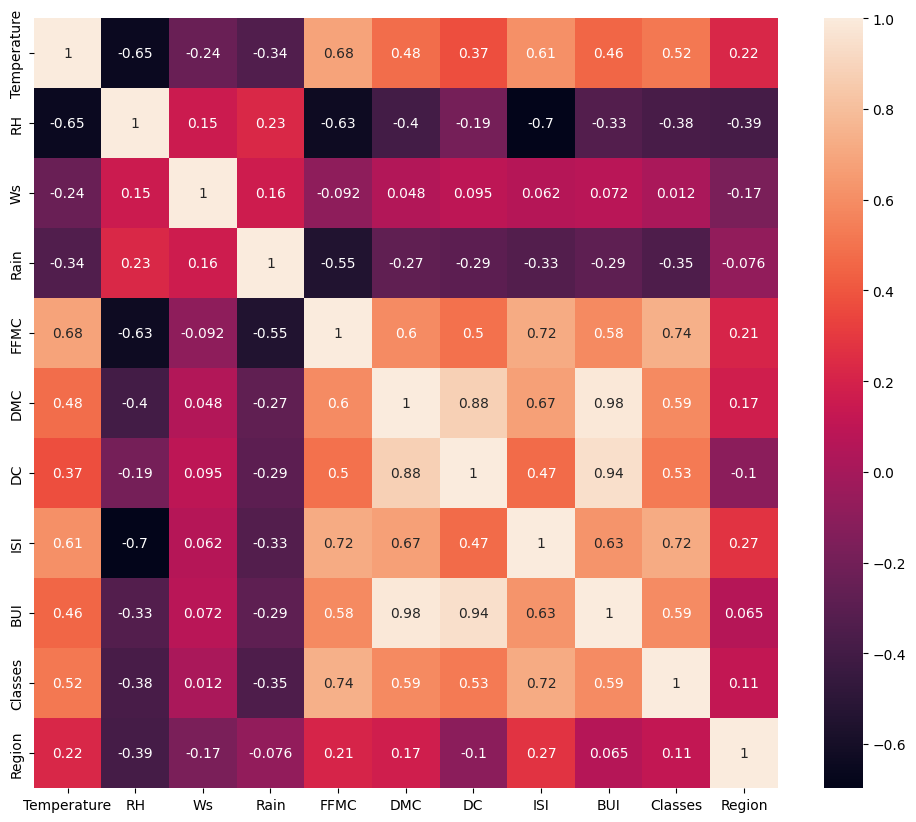

In [13]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [14]:
### defining a Correlation Threshold

def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [15]:
corr_features = correlation(X_train,threshold=0.85)

In [16]:
X_train.drop(corr_features, inplace = True, axis = 1)
X_test.drop(corr_features, inplace = True, axis = 1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-18-0b884ed7246c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'After Scaling')

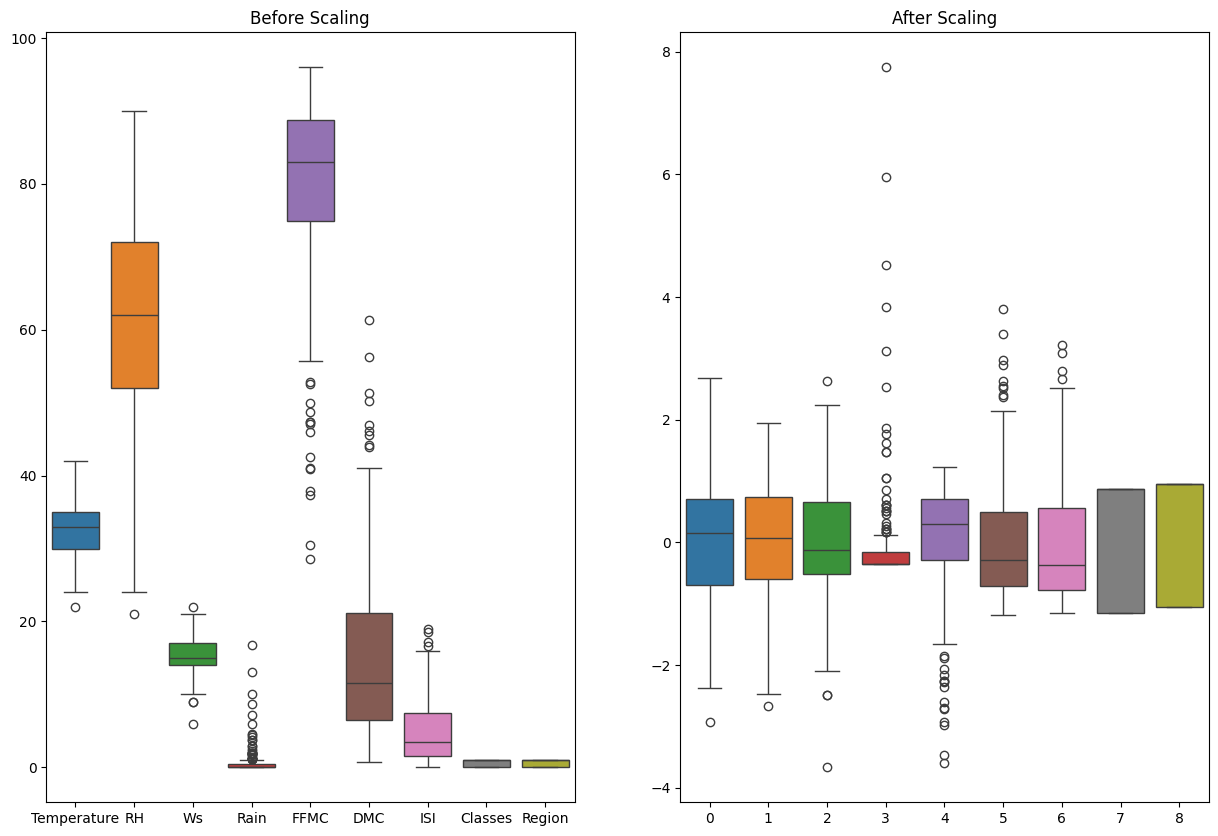

In [18]:
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("After Scaling")

### **L1 Hyperparameter Tuning**

---



In [19]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score


### **While tuning the alpha, higher alpha resulted in very poor performance of the model, while lower(<1) resulted in more model performance this happened because**

- Higher alplha imposes a stronger penalty on the coefficients, forcing more of them towards zero. This can lead to a simpler model with fewer features.

- Lower alpha imposes a weaker penalty, allowing more coefficients to be non-zero. This can lead to a more complex model that might capture more intricate patterns in the data, but also increases the risk of overfitting.

In [20]:

lasso1 = Lasso(alpha= 0.9, max_iter= 100, tol=0.1)
lasso1.fit(X_train_scaled,y_train)

Lasso(alpha=0.9, max_iter=100, tol=0.1)

In [21]:
### testing the data on test dataset
y_pred=lasso1.predict(X_test_scaled)


In [22]:
### Computing the score for test dataset
score = r2_score(y_test,y_pred)
score

0.9541327654468869

Text(0.5, 1.0, 'L1 Regularization')

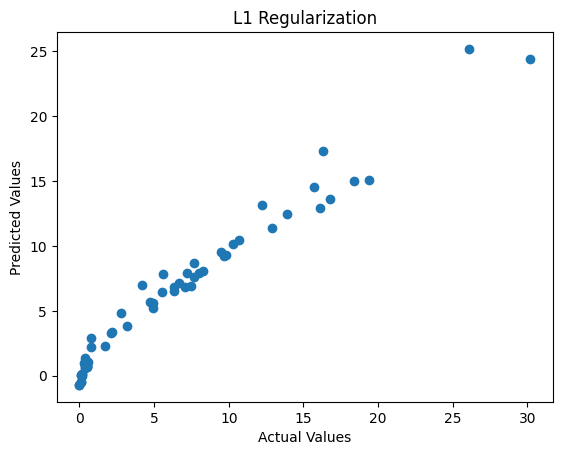

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("L1 Regularization")

### **Lasso CV**

In [24]:
lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [26]:
ypred = lasso_cv.predict(X_test_scaled)

In [27]:
### Test Data Score
score = r2_score(y_test,ypred)
score

0.9769682887671803

Text(0.5, 1.0, 'Lasso CV')

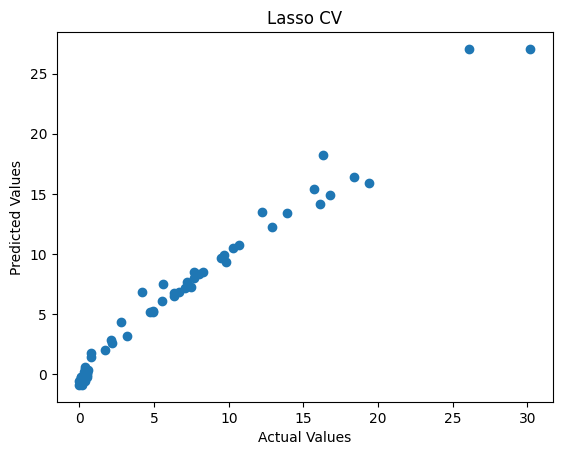

In [29]:

plt.scatter(y_test,ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso CV")

In [66]:
lasso_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [67]:
lasso_cv.alpha_

0.04604352326348554

### **L2 Regularization**

Higher alpha value does not affect the model accuracy that much as compared to L1 but lower alpha value does give slightly better accuracy.

In [53]:
ridge1 = Ridge(alpha = 50, max_iter= 100, tol=0.1)
ridge1.fit(X_train_scaled,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [54]:
ypred = ridge1.predict(X_test_scaled)

In [55]:
score = r2_score(y_test, ypred)
score

0.9362519840055502

Text(0.5, 1.0, 'L2 regularization')

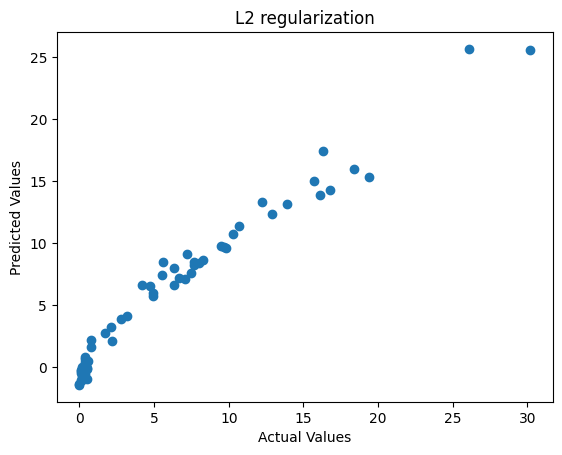

In [49]:
plt.scatter(y_test, ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("L2 regularization")

### **Ridge CV**

In [56]:
Ridge_cv = RidgeCV(cv = 5)
Ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

In [57]:
ypred = Ridge_cv.predict(X_test_scaled)

In [58]:
score = r2_score(y_test, ypred)
score

0.9767905085891716

Text(0.5, 1.0, 'Ridge CV')

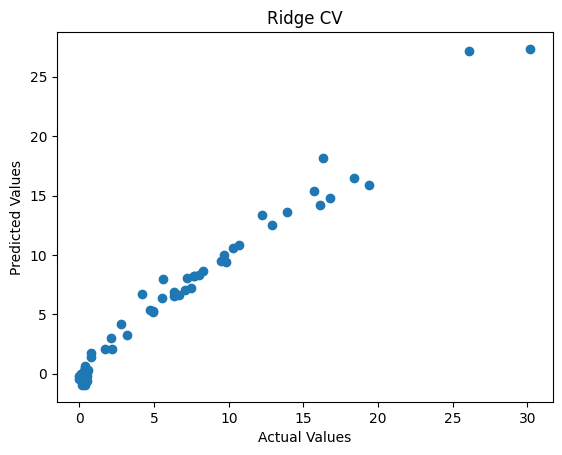

In [69]:
plt.scatter(y_test, ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge CV")

In [64]:
## The selected parameters

Ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [65]:
Ridge_cv.alpha_

1.0

### **Elasticnet Regression**

Even slight increase in alpha results in drastic accuracy drops for EN model

Also higher L1 ratio results in slightly better accuracy

In [96]:
elastic1 = ElasticNet(alpha= 0.8, l1_ratio=0.9, max_iter=100, tol=0.1)
elastic1.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.8, l1_ratio=0.9, max_iter=100, tol=0.1)

In [97]:
ypred = elastic1.predict(X_test_scaled)

In [98]:
 score = r2_score(y_test, ypred)
 score

0.9514153663912407

Text(0.5, 1.0, 'Elastic Net')

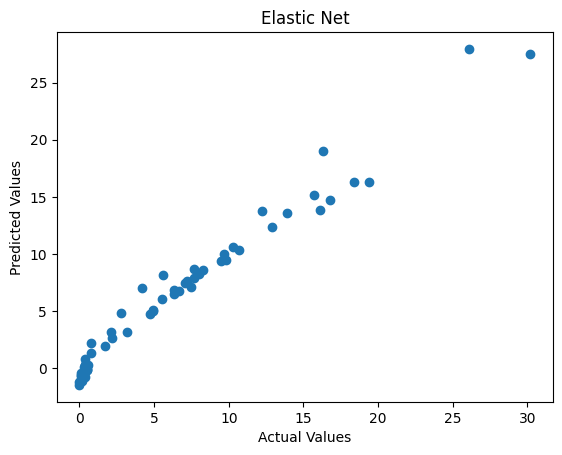

In [73]:
plt.scatter(y_test, ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net")

### **Elastic Net CV**

In [74]:
elastic_cv = ElasticNetCV(cv = 5)
elastic_cv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

In [75]:
ypred = elastic_cv.predict(X_test_scaled)

In [76]:
score = r2_score(y_test, ypred)
score

0.9759931735793255

Text(0.5, 1.0, 'Elastic Net CV')

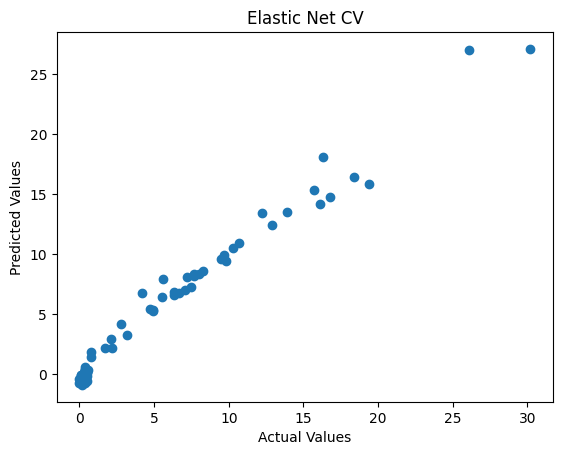

In [77]:
plt.scatter(y_test, ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net CV")

In [78]:
elastic_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [79]:
elastic_cv.alpha_

0.022810664564506852

### **Model Pickling**

In [99]:
import pickle

In [103]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(Ridge_cv, open('ridge.pkl', 'wb'))

In [104]:
Ridge_cv

RidgeCV(cv=5)

In [105]:
with open('ridge_cv.pkl', 'wb') as file:
  pickle.dump(Ridge_cv, file)

with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

In [106]:
import shutil
shutil.copy('ridge_cv.pkl', '/content/drive/MyDrive/Saved Models')
shutil.copy('scaler.pkl', '/content/drive/MyDrive/Saved Models')

'/content/drive/MyDrive/Saved Models/scaler.pkl'